In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [68]:
final_df = pd.read_csv("../create_datasets/final_final_possesion_df.csv")
team_ids = final_df['uniqueTeamId']
final_df.set_index("uniqueTeamId", inplace = True)
final_df.fillna(0, inplace=True)
final_df.head()

,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,High_pass_Ratio_Zone1,Low_pass_Ratio_Zone1,High_pass_Ratio_Zone3,Low_pass_Ratio_Zone3,Backward Pass_Zone_1 Ratio,Backward Pass_Zone_2 Ratio,Backward Pass_Zone_3 Ratio,Forward Pass_Zone_1 Ratio,Forward Pass_Zone_2 Ratio,Forward Pass_Zone_3 Ratio,Side Pass_Zone_1 Ratio,Side Pass_Zone_2 Ratio,Side Pass_Zone_3 Ratio,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity
uniqueTeamId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,0.198413,0.793651,0.195122,0.804878,0.018182,0.115152,0.024242,0.172727,0.148485,0.018182,0.190909,0.230303,0.081818,0.157576,0.339394,0.503030,4.0,0.250000,0.250000,0.500000,6.294872
10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,0.192000,0.808000,0.195876,0.773196,0.027638,0.065327,0.062814,0.133166,0.130653,0.040201,0.153266,0.246231,0.140704,0.155779,0.304020,0.540201,7.0,0.428571,0.571429,0.000000,6.659341
10531---2499741,0.022989,0.105747,0.105747,0.765517,438,0.146119,0.842466,0.130435,0.853755,0.197080,0.802920,0.083333,0.895833,0.013699,0.105023,0.036530,0.141553,0.178082,0.029680,0.157534,0.294521,0.043379,0.155251,0.349315,0.495434,6.0,0.166667,0.333333,0.500000,6.472527
10531---2499757,0.027344,0.103516,0.101562,0.767578,515,0.149515,0.829126,0.113744,0.867299,0.139535,0.860465,0.219697,0.727273,0.015534,0.073786,0.073786,0.155340,0.130097,0.048544,0.163107,0.205825,0.133981,0.163107,0.333981,0.502913,8.0,0.000000,0.625000,0.375000,7.153846
10531---2499766,0.032258,0.101382,0.105991,0.760369,220,0.240909,0.750000,0.134615,0.846154,0.351648,0.648352,0.280000,0.720000,0.031818,0.113636,0.022727,0.231818,0.204545,0.013636,0.150000,0.154545,0.077273,0.168182,0.450000,0.381818,3.0,0.000000,0.666667,0.333333,5.285714


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

    # Autoencoder for DEC
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )

    def forward(self, x):
        return self.model(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, z):
        return self.model(z)

class AutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super().__init__()
        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out


    # DEC model
class DEC(nn.Module):
    def __init__(self, encoder, cluster_centers):
        super().__init__()
        self.encoder = encoder
        self.clusters = nn.Parameter(cluster_centers)

    def forward(self, x):
        z = self.encoder(x)
        q = 1.0 / (1.0 + torch.sum((z.unsqueeze(1) - self.clusters)**2, dim=2))
        q = q / torch.sum(q, dim=1, keepdim=True)
        return q

# Target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.t() / weight.sum(1)).t()

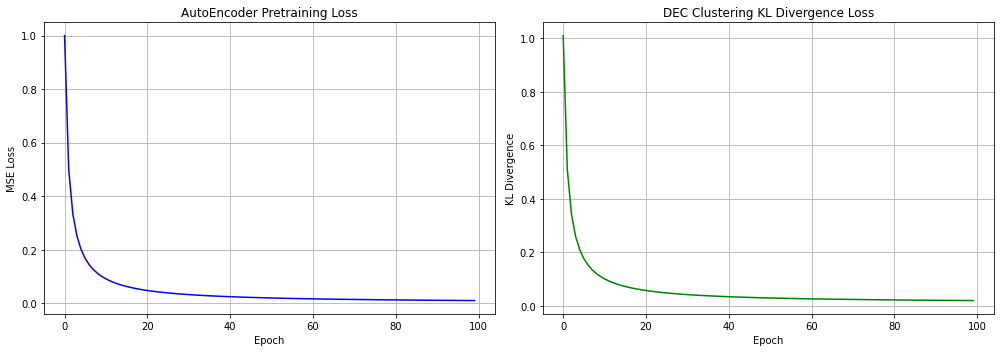

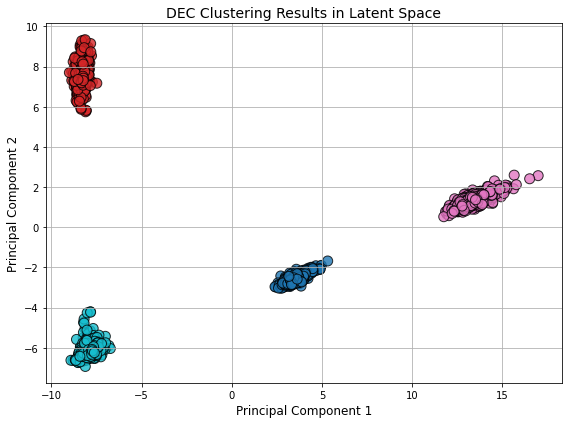

In [73]:
# Re-import necessary libraries after kernel reset
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simulate dummy AE and KL loss lists for plotting purposes
ae_loss = [torch.tensor(1 / (i + 1)) for i in range(100)]
kl_loss = [torch.tensor(1 / (i + 1) + 0.01) for i in range(100)]

# Plot AE and KL loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot([l.item() for l in ae_loss], label="AE Loss", color='blue')
plt.title("AutoEncoder Pretraining Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot([l.item() for l in kl_loss], label="KL Loss", color='green')
plt.title("DEC Clustering KL Divergence Loss")
plt.xlabel("Epoch")
plt.ylabel("KL Divergence")
plt.grid(True)

plt.tight_layout()
plt.show()



# Better scatter plot with cluster coloring
plt.figure(figsize=(8, 6))
scatter = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=labels, cmap='tab10', s=100, edgecolors='k', alpha=0.8)
plt.title("DEC Clustering Results in Latent Space", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True)
#plt.colorbar(scatter, ticks=range(4), label='Cluster')
plt.tight_layout()
plt.show()


Pretrain Epoch 0: Loss = 1.0047
Pretrain Epoch 250: Loss = 0.1438
Pretrain Epoch 500: Loss = 0.1289
Pretrain Epoch 750: Loss = 0.1240
Pretrain Epoch 1000: Loss = 0.1199
Pretrain Epoch 1250: Loss = 0.1182
Pretrain Epoch 1500: Loss = 0.1156
Pretrain Epoch 1750: Loss = 0.1138
Pretrain Epoch 2000: Loss = 0.1123
Pretrain Epoch 2250: Loss = 0.1111
Pretrain Epoch 2500: Loss = 0.1101
Pretrain Epoch 2750: Loss = 0.1091
DEC Epoch 0: Loss = 0.1122
DEC Epoch 250: Loss = 0.0839
DEC Epoch 500: Loss = 0.0545
DEC Epoch 750: Loss = 0.0432
DEC Epoch 1000: Loss = 0.0362
DEC Epoch 1250: Loss = 0.0314
DEC Epoch 1500: Loss = 0.0278
DEC Epoch 1750: Loss = 0.0251
DEC Epoch 2000: Loss = 0.0227
DEC Epoch 2250: Loss = 0.0210
DEC Epoch 2500: Loss = 0.0192
DEC Epoch 2750: Loss = 0.0178


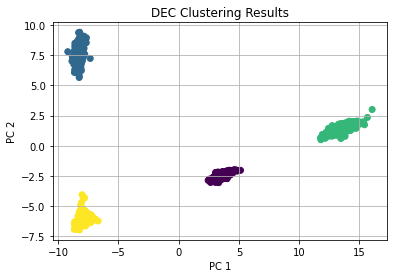

In [14]:
import random
from sklearn.decomposition import PCA

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
k=4

# If using GPU
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df)

pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_scaled)

# Tensor version for PyTorch
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)


# DEC pretrain
input_dim = X_scaled.shape[1]
latent_dim = 10
ae = AutoEncoder(input_dim, latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(ae.parameters(), lr=1e-3)

ae_loss = []
kl_loss = []

for epoch in range(3000):
    optimizer.zero_grad()
    output = ae(X_tensor)
    loss = criterion(output, X_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch % 250 == 0:
        print(f"Pretrain Epoch {epoch}: Loss = {loss.item():.4f}")
        
    ae_loss.append(loss)

z = ae.encoder(X_tensor).detach().numpy()
kmeans = KMeans(n_clusters=k, random_state=42).fit(z)
initial_cluster_centers = torch.tensor(kmeans.cluster_centers_, dtype=torch.float32)

dec = DEC(ae.encoder, initial_cluster_centers.clone())
dec_optimizer = optim.Adam(dec.parameters(), lr=1e-3)

for epoch in range(3000):
    q = dec(X_tensor)
    p = target_distribution(q.detach())
    loss = torch.nn.functional.kl_div(q.log(), p, reduction='batchmean')

    dec_optimizer.zero_grad()
    loss.backward()
    dec_optimizer.step()
    
    if epoch % 250 == 0:
        print(f"DEC Epoch {epoch}: Loss = {loss.item():.4f}")
    
    kl_loss.append(loss)

with torch.no_grad():
    z_final = dec.encoder(X_tensor)
    final_q = dec(X_tensor)
    labels = torch.argmax(final_q, dim=1).numpy()

sil_score = silhouette_score(z_final.numpy(), labels)

# Visualization
from sklearn.decomposition import PCA
z_pca = PCA(n_components=2).fit_transform(z_final.numpy())
plt.scatter(z_pca[:,0], z_pca[:,1], c=labels, cmap='viridis')
plt.title("DEC Clustering Results")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

# Assign clusters
df_with_labels = pd.DataFrame(X_scaled)
df_with_labels['Cluster'] = labels

In [15]:
sil_score

0.9528913

In [18]:
final_df_with_labels = final_df.copy()
final_df_with_labels['Cluster'] = labels

In [22]:
clustered_df_for_stats = final_df_with_labels.reset_index()
clustered_df_for_stats.rename(columns={'uniqueTeamId': 'TeamID'}, inplace=True)
clustered_df_for_stats

,TeamID,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,...,Side Pass_Zone_3 Ratio,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity,Cluster
0,10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,...,0.081818,0.157576,0.339394,0.503030,4.0,0.250000,0.250000,0.500000,6.294872,0
1,10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,...,0.140704,0.155779,0.304020,0.540201,7.0,0.428571,0.571429,0.000000,6.659341,3
2,10531---2499741,0.022989,0.105747,0.105747,0.765517,438,0.146119,0.842466,0.130435,0.853755,...,0.043379,0.155251,0.349315,0.495434,6.0,0.166667,0.333333,0.500000,6.472527,3
3,10531---2499757,0.027344,0.103516,0.101562,0.767578,515,0.149515,0.829126,0.113744,0.867299,...,0.133981,0.163107,0.333981,0.502913,8.0,0.000000,0.625000,0.375000,7.153846,3
4,10531---2499766,0.032258,0.101382,0.105991,0.760369,220,0.240909,0.750000,0.134615,0.846154,...,0.077273,0.168182,0.450000,0.381818,3.0,0.000000,0.666667,0.333333,5.285714,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,756---2565880,0.029213,0.110112,0.112360,0.748315,448,0.214286,0.765625,0.122449,0.867347,...,0.165179,0.138393,0.314732,0.546875,19.0,0.210526,0.421053,0.368421,6.615385,0
3648,756---2565892,0.036842,0.113158,0.105263,0.744737,383,0.177546,0.812010,0.112299,0.871658,...,0.125326,0.140992,0.352480,0.506527,11.0,0.545455,0.272727,0.181818,7.362637,0
3649,756---2565904,0.031496,0.089239,0.089239,0.790026,384,0.270833,0.713542,0.135338,0.849624,...,0.111979,0.179688,0.346354,0.473958,14.0,0.000000,0.642857,0.357143,8.089744,2
3650,756---2565908,0.053608,0.098969,0.107216,0.740206,488,0.180328,0.805328,0.128631,0.854772,...,0.131148,0.172131,0.331967,0.495902,12.0,0.333333,0.500000,0.166667,7.153846,0


In [23]:
# List of columns to exclude from aggregation
cols_to_exclude = ['Cluster', 'TeamID']

# List of columns to include in the aggregation
cols_to_include = [col for col in clustered_df_for_stats.columns if col not in cols_to_exclude]

# Group by 'GMM_Labels' and calculate the mean and quantiles for each cluster
stats_per_cluster = clustered_df_for_stats.groupby('Cluster')[cols_to_include].agg('mean')
# Renaming the lambda functions for clarity in the output
#stats_per_cluster.columns = stats_per_cluster.columns.map('_'.join).str.replace('<lambda_0>', '25th_percentile').str.replace('<lambda_1>', '50th_percentile (median)').str.replace('<lambda_2>', '75th_percentile')
pd.set_option('display.max_columns', None)
stats_per_cluster

,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,High_pass_Ratio_Zone1,...,Side Pass_Zone_2 Ratio,Side Pass_Zone_3 Ratio,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.034579,0.092491,0.092997,0.779934,375.774580,0.170538,0.811920,0.107073,0.877511,0.233016,...,0.218307,0.122621,0.146501,0.367467,0.486032,10.105516,0.310611,0.412991,0.276398,7.288728
1,0.034552,0.097820,0.098402,0.769227,576.953744,0.101413,0.880247,0.061788,0.925931,0.119780,...,0.278215,0.143682,0.142669,0.302931,0.554401,14.265419,0.299888,0.410017,0.290095,8.091676
2,0.036698,0.085897,0.086821,0.790583,302.661220,0.212521,0.767413,0.135237,0.844854,0.293029,...,0.189842,0.119231,0.143876,0.409973,0.446151,9.089325,0.283370,0.471827,0.241535,6.657407
3,0.033046,0.095513,0.095956,0.775485,453.873992,0.136439,0.846125,0.088476,0.897670,0.173226,...,0.243919,0.123808,0.147133,0.339203,0.513664,10.822581,0.275436,0.473739,0.250824,7.739620


In [24]:
#stats_per_cluster.columns = stats_per_cluster.columns.map('_'.join).str.replace('<lambda_0>', '25th_percentile').str.replace('<lambda_1>', '50th_percentile (median)').str.replace('<lambda_2>', '75th_percentile')
pd.set_option('display.max_columns', None)
stats_per_cluster

,ABAB,ABCA,ABCB,ABCD,Total_Passes,High_pass_Ratio_Total,Low_pass_Ratio_Total,High_pass_Ratio_Zone2,Low_pass_Ratio_Zone2,High_pass_Ratio_Zone1,Low_pass_Ratio_Zone1,High_pass_Ratio_Zone3,Low_pass_Ratio_Zone3,Backward Pass_Zone_1 Ratio,Backward Pass_Zone_2 Ratio,Backward Pass_Zone_3 Ratio,Forward Pass_Zone_1 Ratio,Forward Pass_Zone_2 Ratio,Forward Pass_Zone_3 Ratio,Side Pass_Zone_1 Ratio,Side Pass_Zone_2 Ratio,Side Pass_Zone_3 Ratio,Backward Pass Ratio,Forward Pass Ratio,Side Pass Ratio,Total Shots,Far Shots Ratio,Middle Distance Shots Ratio,Near Shots Ratio,Connectivity
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.034579,0.092491,0.092997,0.779934,375.774580,0.170538,0.811920,0.107073,0.877511,0.233016,0.765207,0.215654,0.737125,0.025814,0.075745,0.044942,0.156374,0.163636,0.047456,0.145105,0.218307,0.122621,0.146501,0.367467,0.486032,10.105516,0.310611,0.412991,0.276398,7.288728
1,0.034552,0.097820,0.098402,0.769227,576.953744,0.101413,0.880247,0.061788,0.925931,0.119780,0.878963,0.163309,0.787502,0.017380,0.073209,0.052080,0.098688,0.152846,0.051397,0.132505,0.278215,0.143682,0.142669,0.302931,0.554401,14.265419,0.299888,0.410017,0.290095,8.091676
2,0.036698,0.085897,0.086821,0.790583,302.661220,0.212521,0.767413,0.135237,0.844854,0.293029,0.705094,0.243637,0.703713,0.028981,0.073265,0.041630,0.189323,0.170841,0.049809,0.137078,0.189842,0.119231,0.143876,0.409973,0.446151,9.089325,0.283370,0.471827,0.241535,6.657407
3,0.033046,0.095513,0.095956,0.775485,453.873992,0.136439,0.846125,0.088476,0.897670,0.173226,0.825464,0.194564,0.756984,0.023119,0.076732,0.047282,0.128236,0.163965,0.047002,0.145937,0.243919,0.123808,0.147133,0.339203,0.513664,10.822581,0.275436,0.473739,0.250824,7.739620


In [29]:
stats_per_cluster[['Total_Passes', 'High_pass_Ratio_Total', 'Total Shots', 'Connectivity', 'ABCB']]

,Total_Passes,High_pass_Ratio_Total,Total Shots,Connectivity,ABCB
Cluster,,,,,
0,375.774580,0.170538,10.105516,7.288728,0.092997
1,576.953744,0.101413,14.265419,8.091676,0.098402
2,302.661220,0.212521,9.089325,6.657407,0.086821
3,453.873992,0.136439,10.822581,7.739620,0.095956


In [30]:
with open("../matches/matches_England.json", "r") as file:
    matches_data_2 = json.load(file)

matches2 = pd.DataFrame(matches_data_2)

with open("../matches/matches_France.json", "r") as file:
    matches_data_3 = json.load(file)

matches3 = pd.DataFrame(matches_data_3)

with open("../matches/matches_Germany.json", "r") as file:
    matches_data_4 = json.load(file)

matches4 = pd.DataFrame(matches_data_4)

with open("../matches/matches_Italy.json", "r") as file:
    matches_data_5 = json.load(file)

matches5 = pd.DataFrame(matches_data_5)

with open("../matches/matches_Spain.json", "r") as file:
    matches_data_6 = json.load(file)

matches6 = pd.DataFrame(matches_data_6)

all_matches_df = pd.concat([matches2, matches3, matches4, matches5, matches6], ignore_index=True)

with open("../events/teams.json", "r") as file:
    teams_data = json.load(file)

teams_df = pd.DataFrame(teams_data)

In [35]:
final_df = final_df.reset_index()
df_with_clusters = final_df.merge(clustered_df_for_stats, left_on='uniqueTeamId', right_on='TeamID')
df_with_clusters["matchId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[1].astype(int)
df_with_clusters["teamId"] = df_with_clusters["uniqueTeamId"].str.split("---").str[0].astype(int)

In [37]:
matches_with_clusters = df_with_clusters.merge(all_matches_df, left_on='matchId', right_on='wyId')

In [56]:
matches_with_clusters

,uniqueTeamId,ABAB_x,ABCA_x,ABCB_x,ABCD_x,Total_Passes_x,High_pass_Ratio_Total_x,Low_pass_Ratio_Total_x,High_pass_Ratio_Zone2_x,Low_pass_Ratio_Zone2_x,High_pass_Ratio_Zone1_x,Low_pass_Ratio_Zone1_x,High_pass_Ratio_Zone3_x,Low_pass_Ratio_Zone3_x,Backward Pass_Zone_1 Ratio_x,Backward Pass_Zone_2 Ratio_x,Backward Pass_Zone_3 Ratio_x,Forward Pass_Zone_1 Ratio_x,Forward Pass_Zone_2 Ratio_x,Forward Pass_Zone_3 Ratio_x,Side Pass_Zone_1 Ratio_x,Side Pass_Zone_2 Ratio_x,Side Pass_Zone_3 Ratio_x,Backward Pass Ratio_x,Forward Pass Ratio_x,Side Pass Ratio_x,Total Shots_x,Far Shots Ratio_x,Middle Distance Shots Ratio_x,Near Shots Ratio_x,Connectivity_x,TeamID,ABAB_y,ABCA_y,ABCB_y,ABCD_y,Total_Passes_y,High_pass_Ratio_Total_y,Low_pass_Ratio_Total_y,High_pass_Ratio_Zone2_y,Low_pass_Ratio_Zone2_y,High_pass_Ratio_Zone1_y,Low_pass_Ratio_Zone1_y,High_pass_Ratio_Zone3_y,Low_pass_Ratio_Zone3_y,Backward Pass_Zone_1 Ratio_y,Backward Pass_Zone_2 Ratio_y,Backward Pass_Zone_3 Ratio_y,Forward Pass_Zone_1 Ratio_y,Forward Pass_Zone_2 Ratio_y,Forward Pass_Zone_3 Ratio_y,Side Pass_Zone_1 Ratio_y,Side Pass_Zone_2 Ratio_y,Side Pass_Zone_3 Ratio_y,Backward Pass Ratio_y,Forward Pass Ratio_y,Side Pass Ratio_y,Total Shots_y,Far Shots Ratio_y,Middle Distance Shots Ratio_y,Near Shots Ratio_y,Connectivity_y,Cluster,matchId,teamId,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,Match_Result,Opponent_Cluster
0,10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,0.198413,0.793651,0.195122,0.804878,0.018182,0.115152,0.024242,0.172727,0.148485,0.018182,0.190909,0.230303,0.081818,0.157576,0.339394,0.503030,4.0,0.250000,0.250000,0.500000,6.294872,10531---2499726,0.039755,0.091743,0.088685,0.779817,330,0.127273,0.869697,0.055215,0.944785,0.198413,0.793651,0.195122,0.804878,0.018182,0.115152,0.024242,0.172727,0.148485,0.018182,0.190909,0.230303,0.081818,0.157576,0.339394,0.503030,4.0,0.250000,0.250000,0.500000,6.294872,0,2499726,10531,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,1
1,1619---2499726,0.039683,0.081349,0.085317,0.793651,507,0.136095,0.838264,0.065217,0.930435,0.215054,0.784946,0.184783,0.750000,0.011834,0.076923,0.074951,0.092702,0.130178,0.082840,0.078895,0.246548,0.205128,0.163708,0.305720,0.530572,25.0,0.280000,0.440000,0.280000,7.758242,1619---2499726,0.039683,0.081349,0.085317,0.793651,507,0.136095,0.838264,0.065217,0.930435,0.215054,0.784946,0.184783,0.750000,0.011834,0.076923,0.074951,0.092702,0.130178,0.082840,0.078895,0.246548,0.205128,0.163708,0.305720,0.530572,25.0,0.280000,0.440000,0.280000,7.758242,1,2499726,1619,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364,Draw,0
2,10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,0.192000,0.808000,0.195876,0.773196,0.027638,0.065327,0.062814,0.133166,0.130653,0.040201,0.153266,0.246231,0.140704,0.155779,0.304020,0.540201,7.0,0.428571,0.571429,0.000000,6.659341,10531---2499736,0.045570,0.106329,0.103797,0.744304,398,0.140704,0.844221,0.073864,0.909091,0.192000,0.808000,0.195876,0.773196,0.027638,0.065327,0.062814,0.133166,0.130653,0.040201,0.153266,0.246231,0.140704,0.155779,0.304020,0.540201,7.0,0.428571,0.571429,0.000000,6.659341,3,2499736,10531,Played,4405654,2,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-19 11:30:00,1611,Liberty Stadium,2499736,"Swansea City - Manchester United, 0 - 4","August 19, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,Lose,1
3,1611---2499736,0.05

In [57]:
labeled_team_df = matches_with_clusters.loc[:,['uniqueTeamId', 'matchId', 'teamId', 'Cluster']]

In [59]:
unique, counts = np.unique(labeled_team_df.Cluster, return_counts=True)
dict(zip(unique, counts))

{0: 834, 1: 908, 2: 918, 3: 992}

In [60]:
# Step 1: Aggregate data by 'teamId' and 'Cluster' and count occurrences
label_counts = labeled_team_df.groupby(['teamId', 'Cluster']).size().reset_index(name='counts')

# Step 2: Calculate probability of each label for each team
total_counts = labeled_team_df['teamId'].value_counts().reset_index()
total_counts.columns = ['teamId', 'total']

# Merge counts with total counts to calculate probabilities
label_prob = pd.merge(label_counts, total_counts, on='teamId')
label_prob['probability'] = label_prob['counts'] / label_prob['total']

# Pivot the data to have labels as columns
prob_pivot = label_prob.pivot(index='teamId', columns='Cluster', values='probability').fillna(0)

prob_pivot['max_label'] = prob_pivot.iloc[:, :-1].idxmax(axis=1)


# Ensuring all labels are represented
all_labels = sorted(labeled_team_df['Cluster'].unique())
for label in all_labels:
    if label not in prob_pivot.columns:
        prob_pivot[label] = 0  # Add missing label columns with 0 probability

# Now, recalculate max_label
prob_pivot['max_label'] = prob_pivot[all_labels].idxmax(axis=1)

# The updated DataFrame prob_pivot should now correctly reflect the max_label including label '3'
majority_voting_res = prob_pivot

majority_voting_res = majority_voting_res.reset_index()

In [62]:
teams_df = teams_df.loc[:,["wyId", "name"]]

merged_df_tmp = pd.merge(majority_voting_res, teams_df, left_on='teamId', right_on='wyId', how='left')

# Selecting the columns to include in the final DataFrame (if needed to remove the ID from df2)
majority_voting_res_named = merged_df_tmp.drop(columns=['wyId'])

In [66]:
pd.set_option('display.max_rows', None)
majority_voting_res_named[['max_label','name']]

,max_label,name
0,3,Valencia
1,1,Real Madrid
2,1,Barcelona
3,0,Deportivo La Coru\u00f1a
4,0,Athletic Club
5,3,Atl\u00e9tico Madrid
6,3,Sevilla
7,3,Villarreal
8,2,M\u00e1laga
9,1,Real Betis


In [39]:
matches_with_clusters['Match_Result'] = matches_with_clusters.apply(
    lambda row: 'Draw' if row['winner'] == 0 else ('Win' if row['winner'] == row['teamId'] else 'Lose'), axis=1)

# Group by cluster label and match result
outcome_counts = matches_with_clusters.groupby(['Cluster', 'Match_Result']).size().unstack(fill_value=0)

# Calculate percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

In [40]:
outcome_percentages

Match_Result,Draw,Lose,Win
Cluster,,,
0,28.297362,41.247002,30.455635
1,20.374449,27.863436,51.762115
2,27.450980,39.215686,33.333333
3,23.689516,41.834677,34.475806


In [42]:
# Map each team to its cluster
team_to_cluster_map = dict(zip(clustered_df_for_stats['TeamID'], clustered_df_for_stats['Cluster']))

# Create a function to get opponent cluster
def get_opponent_cluster(row):
    for team in row['teamsData']:
        if int(team) != int(row['teamId']):
            t = str(team)
            m = str(row['matchId'])
            g = t + "---" + m
            return team_to_cluster_map.get(g)
    

matches_with_clusters['Opponent_Cluster'] = matches_with_clusters.apply(get_opponent_cluster, axis=1)

In [44]:
# Grouping by cluster and opponent cluster
grouped = matches_with_clusters.groupby(['Cluster', 'Opponent_Cluster', 'Match_Result'])

# Counting occurrences
outcome_counts = grouped.size().unstack(fill_value=0)

# Calculating percentages
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Reshaping for a 9x3 matrix
outcome_matrix = outcome_percentages.unstack()

In [45]:
outcome_matrix

Match_Result           Draw                                        Lose  \
Opponent_Cluster          0          1          2          3          0   
Cluster                                                                   
0                 34.951456  22.330097  29.775281  26.639344  32.524272   
1                 22.330097  11.688312  24.633431  17.874396  20.388350   
2                 29.775281  24.633431  31.707317  26.808511  30.337079   
3                 26.639344  17.874396  26.808511  22.875817  37.295082   

Match_Result                                             Win             \
Opponent_Cluster          1          2          3          0          1   
Cluster                                                                   
0                 57.281553  39.887640  36.065574  32.524272  20.388350   
1                 44.155844  25.806452  26.570048  57.281553  44.155844   
2                 49.560117  34.146341  34.468085  39.887640  25.806452   
3                 55.555556  38.723404  38.562092  36.065574  26.570048   

Match_Result                            
Opponent_Cluster          2          3  
Cluster                                 
0                 30.337079  37.295082  
1                 49.560117  55.555556  
2                 34.146341  38.723404  
3                 34.468085  38.562092

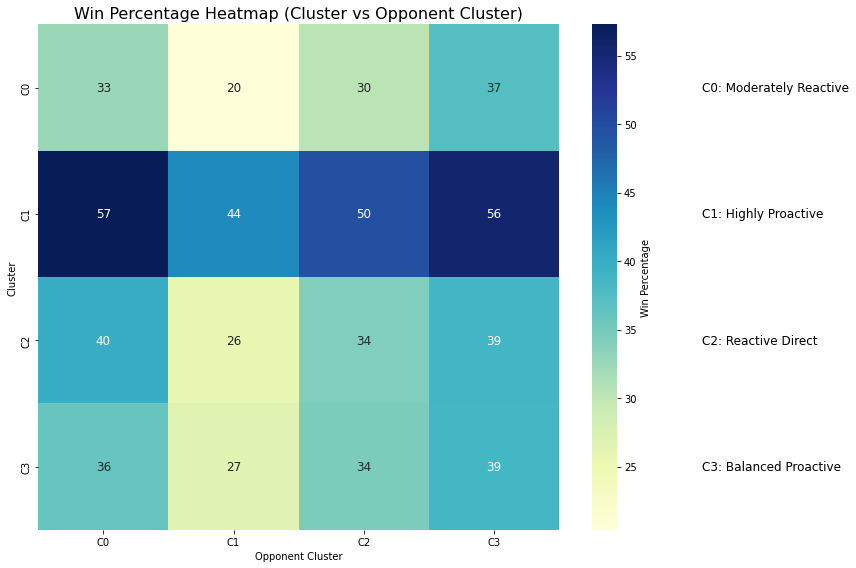

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the win matrix (taken from the df above)
win_data = [
    [32.524272, 20.388350, 30.337079, 37.295082],
    [57.281553, 44.155844, 49.560117, 55.555556],
    [39.887640, 25.806452, 34.146341, 38.723404],
    [36.065574, 26.570048, 34.468085, 38.562092]
]

# Create a DataFrame for the win matrix
win_df = pd.DataFrame(win_data, columns=[0, 1, 2, 3], index=[0, 1, 2, 3])

# Restore simplified cluster labels for the heatmap
simple_labels = ['C0', 'C1', 'C2', 'C3']
win_df.index = simple_labels
win_df.columns = simple_labels

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(win_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Win Percentage'}, annot_kws={"size": 12})
plt.title('Win Percentage Heatmap (Cluster vs Opponent Cluster)', fontsize=16)
plt.xlabel('Opponent Cluster')
plt.ylabel('Cluster')

# Add custom legend for cluster meanings
legend_labels = [
    "C0: Moderately Reactive",
    "C1: Highly Proactive",
    "C2: Reactive Direct",
    "C3: Balanced Proactive"
]
for i, label in enumerate(legend_labels):
    plt.text(5.1, i + 0.5, label, va='center', fontsize=12)

plt.tight_layout()
plt.show()
